In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

def initialize(n, seed, v0):
    mass = np.ones(n)/n
    if n == 2:
        pos = np.array([[1.0,0,0],[-1.0,0,0]])
        vel = np.array([[0,v0,0],[0,-v0,0]])
    else:
        pos = np.zeros((n,3))
        vel = np.zeros((n,3))
    return mass,pos,vel

def potential_energy(mass, pos, eps2):
    n = len(mass)
    pot = 0.0
    dx = np.zeros((n,3))
    for i in range(n):
        dx[i+1:] = pos[i+1:] - pos[i]
        dr2 = (dx[i+1:]**2).sum(axis=1) + eps2
        pot -= mass[i]*(mass[i+1:]/np.sqrt(dr2)).sum()
    return pot

def alt_potential_energy(mass, pos, eps2):
    n = len(mass)
    pot = 0.0
    for i in range(n):
        for j in range(i+1,n):
            dr2 = eps2
            for k in range(3):
                dr2 += (pos[i,k]-pos[j,k])**2
            pot -= mass[i]*mass[j]/math.sqrt(dr2)
    return pot

def kinetic_energy(mass, vel):
    return 0.5*(mass*(vel**2).sum(axis=1)).sum()

def alt_kinetic_energy(mass, vel):
    n = len(mass)
    kin = 0.0
    for i in range(n):
        vi2 = 0.0
        for k in range(3):
            vi2 += vel[i,k]**2
        kin += 0.5*mass[i]*vi2
    return kin

def energy(mass, pos, vel, eps2):
    T = kinetic_energy(mass, vel)
    U = potential_energy(mass, pos, eps2)
    return T+U

def output(t, E0, mass, pos, vel, eps2):
    E = energy(mass, pos, vel, eps2)
    print('t =', t, 'dE =', E-E0)

def acceleration(mass, pos, eps2):
    n = len(mass)
    acc = np.zeros((n,3))
    for i in range(n):
        dx   = pos - pos[i]
        dr2  = (dx**2).sum(axis=1) + eps2
        dr2i = 1./dr2
        dr3i = mass*np.sqrt(dr2i)*dr2i
        dx  *= dr3i.reshape(n,1)
        acc[i] = dx.sum(axis=0)
    return acc

def alt_acceleration(mass, pos, eps2):
    n = len(mass)
    acc = np.zeros((n,3))
    for i in range(n):
        for j in range(i+1,n):
            dr2 = eps2
            for k in range(3):
                dr2 += (pos[j,k]-pos[i,k])**2
            dr2i = 1./dr2
            dr3i = dr2i*math.sqrt(dr2i)
            for k in range(3):
                dxij = (pos[j,k]-pos[i,k])*dr3i
                acc[i,k] += mass[j]*dxij
                acc[j,k] -= mass[i]*dxij
    return acc

def step(t, mass, pos, vel, eps2, dt):

    # Second-order predictor-corrector.

    acc = acceleration(mass, pos, eps2)
    pos += dt*(vel+0.5*dt*acc)
    anew = acceleration(mass, pos, eps2)
    vel += 0.5*dt*(acc+anew)

    return t+dt,pos,vel

def reverse_step(t, mass, pos, vel, eps2, dt):

    # Second-order predictor-corrector.

    acc = acceleration(mass, pos, eps2)
    pos -= dt*(vel+0.5*dt*acc)
    anew = acceleration(mass, pos, eps2)
    vel -= 0.5*dt*(acc+anew)

    return t-dt,pos,vel

tiny = 1.e-20
def main(N, seed, eps, dt, t_end, v0):
    if eps <= 0.0: eps = tiny

    # Initial conditions.

    t = 0.0
    mass,pos,vel = initialize(N, seed, v0)

    # Initial diagnostics.
    
    E0 = energy(mass, pos, vel, eps**2)
    print('Initial E =', E0)
    output(t, E0, mass, pos, vel, eps**2)

    # Run forward to specified time.

    xplot0 = [pos[0][0]]
    yplot0 = [pos[0][1]]
    xplot1 = [pos[1][0]]
    yplot1 = [pos[1][1]]
    while t < t_end-0.5*dt:
        t,pos,vel = step(t, mass, pos, vel, eps**2, dt)
#         xplot0.append(pos[0][0])
#         yplot0.append(pos[0][1])
#         xplot1.append(pos[1][0])
#         yplot1.append(pos[1][1])

#     plt.plot(xplot0, yplot0, 'b')
#     plt.plot(xplot1, yplot1, 'r')

    
    while t > 0:
        t,pos,vel = step(t, mass, pos, vel, eps**2, -1*dt)
        xplot0.append(pos[0][0])
        yplot0.append(pos[0][1])
        xplot1.append(pos[1][0])
        yplot1.append(pos[1][1])
        
    plt.plot(xplot0, yplot0, 'b')
    plt.plot(xplot1, yplot1, 'r')
    
    print(pos,vel)
    
N = 2
seed = 42
eps = .05
dt = .001
t_end = 10
v0 = .25


main(N, seed, eps, dt, t_end, v0)


Initial E = -0.09371095580101532
t = 0.0 dE = 0.0
[[ 1.0000000e+00 -3.9308834e-15  0.0000000e+00]
 [-1.0000000e+00  3.9308834e-15  0.0000000e+00]] [[ 1.88301523e-15  2.50000000e-01  0.00000000e+00]
 [-1.88301523e-15 -2.50000000e-01  0.00000000e+00]]


Initial E = -0.09375
t = 0.0 dE = 0.0
1.99937529306031 0.0 0.0
0.672703328709044 4.799999999999999 -0.08763812890102717
0.6752341559450562 14.499999999999964 -0.039328949401236414
0.678668146974993 24.200000000000074 0.009021338407811498
0.6718630540294573 33.80000000000021 -0.16620969163722019
0.6739809986497262 43.50000000000035 -0.11797849341293898
[[ 0.85753339  0.3171523   0.        ]
 [-0.85753339 -0.3171523   0.        ]] [[-0.19398063  0.21979156  0.        ]
 [ 0.19398063 -0.21979156  0.        ]]


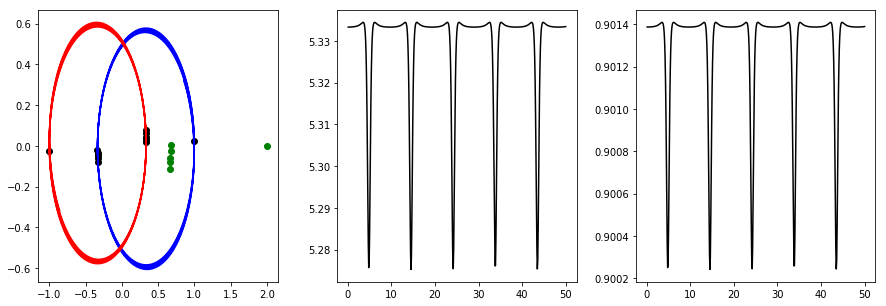

In [2]:
tiny = 1.e-20
def main(N, seed, eps, dt, t_end, v0):
    if eps <= 0.0: eps = tiny

    # Initial conditions.

    t = 0.0
    mass,pos,vel = initialize(N, seed, v0)

    # Initial diagnostics.
    
    E0 = energy(mass, pos, vel, eps**2)
    print('Initial E =', E0)
    output(t, E0, mass, pos, vel, eps**2)

    # Run forward to specified time.

    xplot0 = [pos[0][0]]
    yplot0 = [pos[0][1]]
    xplot1 = [pos[1][0]]
    yplot1 = [pos[1][1]]
    dEplot = [0]
    
    r = 0
    rp = 0
    
    rmaxplot = [0]
    anglemaxplot = []
    tmaxplot = []
    
    xplot0max = []
    yplot0max = []
    xplot1max = []
    yplot1max = []
    
    tplot = []
    
    aplot = []
    eplot = []
    
    while t < t_end-0.5*dt:
        t,pos,vel = step(t, mass, pos, vel, eps**2, dt)
        
        tplot.append(t)
        xplot0.append(pos[0][0])
        yplot0.append(pos[0][1])
        xplot1.append(pos[1][0])
        yplot1.append(pos[1][1])
        dEplot.append(energy(mass, pos, vel, eps**2) - dEplot[-1])
        
        rnew = np.sqrt((pos[0][0] - pos[1][0])**2 + (pos[0][1] - pos[1][1])**2)
        if (rp >= r) and (r <= rnew):
            
            xplot0max.append(pos[0][0])
            yplot0max.append(pos[0][1])
            xplot1max.append(pos[1][0])
            yplot1max.append(pos[1][1])
            
            tmax = t - dt #have to go back one time step because r max was one step ago
            anglemax = np.arctan((yplot0[-2] - yplot1[-2]) / (xplot0[-2] - xplot1[-2]))
            tmaxplot.append(tmax)
            anglemaxplot.append(anglemax)
            rmaxplot.append(rnew)
            print(rnew, tmax, anglemax)
            
        rp = r
        r = rnew
        
        xL = np.array([pos[0][0] - pos[1][0], pos[0][1] - pos[1][1], 0])
        vL = np.array([vel[0][0] - vel[1][0], vel[0][1] - vel[1][1], 0])
        h = np.linalg.norm(np.cross(xL, vL))
        E = energy(mass, pos, vel, eps**2)
        M = np.sum(mass)
        
        anew = -1 / (2 * E)
        enew = np.sqrt(1 + (2*E*h**2))
        
        aplot.append(anew)
        eplot.append(enew)
        
    
    rmaxplot.pop(0)
    
    
    fig, ax = plt.subplots(1, 3, figsize = (15, 5))
    fig.suptitle('') 
    plt.subplots_adjust(wspace=.25)

# vint = vp + (y[1]-vp)*(y[0]-y0)/(y[0]-yp)
# print('vint =', vint, 'err =', abs((vint-v0)/v0))

    ax[0].plot(rmaxplot*np.cos(anglemaxplot), rmaxplot*np.sin(anglemaxplot), 'go')
    ax[0].plot(xplot0max,yplot0max, 'ko')
    ax[0].plot(xplot1max,yplot1max, 'ko')
    ax[0].plot(xplot0, yplot0, 'b')
    ax[0].plot(xplot1, yplot1, 'r')
    ax[0].set(xlabel = '', ylabel = '', title = '')

    ax[1].plot(tplot, aplot, 'k')
    ax[1].set(xlabel = '', ylabel = '', title = '')
    
    ax[2].plot(tplot, eplot, 'k')

    
#     while t > 0:
#         t,pos,vel = step(t, mass, pos, vel, eps**2, -1*dt)
#         xplot0.append(pos[0][0])
#         yplot0.append(pos[0][1])
#         xplot1.append(pos[1][0])
#         yplot1.append(pos[1][1])
        
#     plt.plot(xplot0, yplot0, 'b')
#     plt.plot(xplot1, yplot1, 'r')
    
    print(pos,vel)
    
N = 2
seed = 42
eps = 0
dt = .1
t_end = 50
v0 = .25


main(N, seed, eps, dt, t_end, v0)

In [21]:
pos = np.array([[1.0,0,0],[-1.0,0,0]])
mass = np.array([1/2,1/2])

In [16]:
np.concatenate((a[0:1], a[2:]))

array([1, 3])

NameError: name 'mass' is not defined